## 6. What is LightGBM, How to implement it? How to fine tune the parameters?

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.10.13 </div>
<div style="text-align: right\"> Last update: 2021.10.13</div>

- 출처 : https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/
- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

from scipy.signal import find_peaks

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

LGBM은 GBRT를 사용하는 Tree 기반 알고리즘임  
기존의 다른 tree 기반 알고리즘 과 차이점은?  
LGBM은 트리가 수직으로 확장되는 반면(leaf-wise), 다른 것들은 수평으로 확장된다.(level wise)  
확장하기 위해서 max delta loss를 가진 leaf를 선택하게 되는 것이죠. 동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄일 수 있습니다.

아래 다이어그램은 LightGBM와 다른 Boosting 부스팅 알고리즘의 구현을 나타내고 있습니다.

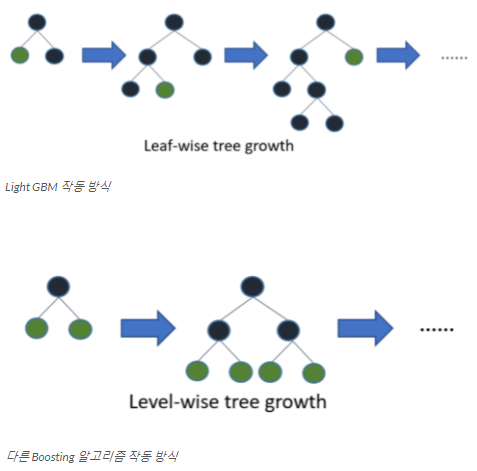

LGBM 장점  
가볍고 빨라서 큰사이즈의 데이터를 다룰 때 메모리를 적게 차지  
gpu 지원

- 작은 데이터 셋트에는 부적합. overfit 우려  
- 10000개 이상 샘플에 ㅈ거함

파라미터 튜닝은 어떻게??  
- 파라미터가 100개 이상되지만 일부만 튜닝하면 됨

파라미터 소개

- **max_depth :** Tree의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다. 만약 여러분의 모델이 과적합된 것 같다고 느끼신다면 제 조언은 max_depth 값을 줄이라는 것입니다.

- **min_data_in_leaf :** Leaf가 가지고 있는 최소한의 레코드 수입니다. 디폴트값은 20으로 최적 값입니다. 과적합을 해결할 때 사용되는 파라미터입니다.

- **feature_fraction :** Boosting (나중에 다뤄질 것입니다) 이 랜덤 포레스트일 경우 사용합니다. 0.8 feature_fraction의 의미는 Light GBM이 Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미합니다.

- **bagging_fraction :** 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용됩니다.

- **early_stopping_round :** 이 파라미터는 분석 속도를 높이는데 도움이 됩니다. 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단합니다. 이는 지나친 iteration을 줄이는데 도움이 됩니다.

- **lambda :** lambda 값은 regularization 정규화를 합니다. 일반적인 값의 범위는 0 에서 1 사이입니다.

- **min_gain_to_split :** 이 파라미터는 분기하기 위해 필요한 최소한의 gain을 의미합니다. Tree에서 유용한 분기의 수를 컨트롤하는데 사용됩니다.

- **max_cat_group :** 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾습니다. 그래서 Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾습니다. 디폴트 값은 64 입니다.

핵심 파라미터 소개

- **Task :** 데이터에 대해서 수행하고자 하는 임무를 구체화합니다. train 트레이닝일 수도 있고 predict 예측일 수도 있습니다.

- **application :** 가장 중요한 파라미터로, 모델의 어플리케이션을 정하는데 이것이 regression 회귀분석 문제인지 또는 classification 분류 문제인지를 정합니다. Light GBM에서 디폴트는 regression 회귀분석 모델입니다.

    - regression: 회귀분석
    - binary: 이진 분류
    - multiclass: 다중 분류  
        
- **boosting :** 실행하고자 하는 알고리즘 타입을 정의합니다. 디폴트값은 gdbt 입니다.
    - gdbt : Traditional Gradient Boosting Decision Tree
    - rf : Random Forest
    - dart : Dropouts meet Multiple Additive Regression Trees
    - goss : Gradient-based One-Side Sampling

- **num_boost_round :** boosting iteration 수로 일반적으로 100 이상입니다.

- **learning_rate :** 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수입니다. GBM은 초기의 추정값에서 시작하여 각각의Tree 결과를 사용하여 추정값을 업데이트 합니다. 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤합니다. 일반적인 값은 0.1, 0.001, 0.003 등등이 있습니다.

- **num_leaves :** 전체 Tree의 leave 수 이고, 디폴트값은 31입니다.

- **device :** 디폴트 값은 cpu 인데 gpu로 변경할 수도 있습니다.

지표 파라미터  
- metric  
    - mae : mean absolute error
    - mse : mean squared error
    - binary_logloss : loss for binary classification
    - multi_logloss : loss for multi classification

io 파라미터  

- **max_bin :** feature 값의 최대 bin 수를 의미합니다.

- **categorical_feature :*** 범주형 feature의 인덱스를 의미합니다. 만약 categorical_features 가 0, 1, 2 이면 column 0, column 1, column 2 가 범주형 변수들입니다.

- **ignore_column :** categorical_features와 동일한 것인데 범주형 feature로써 특정 칼럼을 고려하지 않는 것입니다. 그 변수들을 무시하는 것입니다.

- **save_binary :** 데이터 파일의 메모리 사이즈를 처리해야 한다면 이 파라미터 값을 True로 설정하십시오. 이 값을 True로 세팅하면 데이터 세트를 바이너리 파일로 저장할 것이고, 이 바이너리 파일은 다음에 데이터를 읽어올 때 그 속도를 줄여줄 것입니다.

### 구현

### 데이터 전처리

데이터 읽기

In [3]:
df = pd.read_csv('data/social network ads/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
X = df[['Age', 'EstimatedSalary']]

In [7]:
y = df['Purchased']

In [8]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

스케일링

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 모델 구축 및 학습

데이터 셋을 LGBM 데이터셋으로 바꾸는 것을 권장한다.  
모델 파라미터는 딕셔너리로 구성한다.  
모델을 학습할 때 100회 이터레이션하였다.

In [14]:
import lightgbm as lgb

In [15]:
d_train = lgb.Dataset(X_train, label = y_train)

In [23]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

params['verbose'] = -1

In [24]:
clf = lgb.train(params, d_train, 100)

- objective : 이진분류라서 binary로 설정  
- metric : 이진분류라서 binary_logloss로 설정  
- num_leaves : small data라서 ...  
- boosting type : gbdt

### Model prediction

In [42]:
y_pred = clf.predict(X_test)

In [43]:
y_pred

array([0.32646099, 0.34539123, 0.32646099, 0.32646099, 0.32646099,
       0.28510955, 0.32646099, 0.34539123, 0.28510955, 0.48920241,
       0.32646099, 0.28510955, 0.34539123, 0.34539123, 0.28510955,
       0.32646099, 0.34539123, 0.28510955, 0.48920241, 0.32646099,
       0.32646099, 0.48920241, 0.34539123, 0.48920241, 0.28510955,
       0.48920241, 0.28510955, 0.29191434, 0.34539123, 0.32646099,
       0.28510955, 0.34539123, 0.48920241, 0.34539123, 0.28510955,
       0.28510955, 0.28510955, 0.32646099, 0.32646099, 0.48920241,
       0.28510955, 0.34539123, 0.28510955, 0.32646099, 0.41220969,
       0.28510955, 0.34539123, 0.48920241, 0.28510955, 0.48920241,
       0.48920241, 0.32646099, 0.32646099, 0.32646099, 0.48920241,
       0.48920241, 0.29191434, 0.28510955, 0.48920241, 0.28510955,
       0.32646099, 0.48920241, 0.28510955, 0.34539123, 0.28510955,
       0.48920241, 0.28510955, 0.28510955, 0.34539123, 0.34539123,
       0.32646099, 0.32646099, 0.28510955, 0.48920241, 0.28510

이진 값으로 변환

In [44]:
for i in range(0, len(y_pred)):
    if y_pred[i] >= .5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [45]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### 결과 확인

In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [48]:
cm

array([[68,  0],
       [32,  0]], dtype=int64)

In [49]:
accuracy

0.68

### 파라미터 튜닝관련

Data scientists always struggle in deciding when to use which parameter? and what should be the ideal value of that parameter?
Following set of practices can be used to improve your model efficiency.  

1. num_leaves: This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.  
2. min_data_in_leaf: Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.  
3. max_depth: You also can use max_depth to limit the tree depth explicitly.  

**For Faster Speed:**
- Use bagging by setting bagging_fraction and bagging_freq  
- Use feature sub-sampling by setting feature_fraction  
- Use small max_bin  
- Use save_binary to speed up data loading in future learning  
- Use parallel learning, refer to parallel learning guide.  
  
**For better accuracy:**
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves(may cause over-fitting)
- Use bigger training data
- Try dart  
- Try to use categorical feature directly  

**To deal with over-fitting:**
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
- Try max_depth to avoid growing deep tre

결과 잘 안나옴.. 다시 볼 것